# **Person face match with CNIC**

In [ ]:
!pip install MTCNN
from mtcnn  import MTCNN

In [ ]:
!pip install deepface
from deepface import DeepFace

In [ ]:
import dlib
import math
import cv2

In [ ]:
import urllib.request

url = "https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5"
weights_path = "/root/.deepface/weights/vgg_face_weights.h5"

urllib.request.urlretrieve(url, weights_path)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from google.colab import files

In [ ]:
# I have to Upload the Haar Cascade XML file
uploaded = files.upload()

#After uploading I have to Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default (1).xml


**For detecting the image**

In [ ]:
# I will upload the image to process
# uploaded_image = files.upload()

# Load and convert the image to grayscale
image = cv2.imread("/content/drive/MyDrive/testing/face/f1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
#Know I'm performing face detection process
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Drawing the rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert image from OpenCV format to PIL format for displaying in Colab
pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

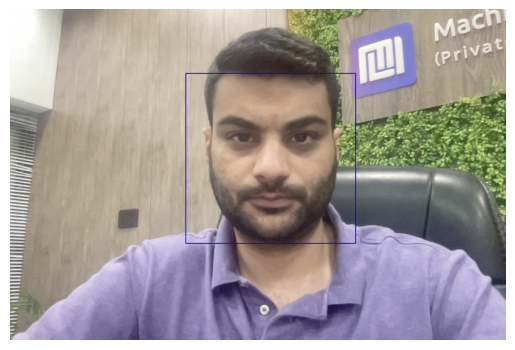

In [ ]:
# Displaying the image with detected faces
plt.imshow(pil_image)
plt.axis('off')
plt.show()

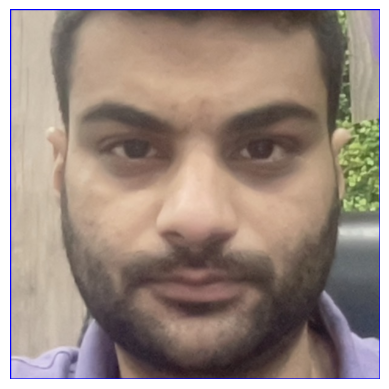

In [ ]:
# Here I'm Cropping the detected faces
for idx, (x, y, w, h) in enumerate(faces):
    # Crop the face region
    face_cropped = image[y:y+h, x:x+w]

    # Here I'm displaying the cropped face
    plt.subplot(1, len(faces), idx + 1)
    plt.imshow(cv2.cvtColor(face_cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

**For Detecting the CNIC**

In [ ]:
# I will upload the CNIC image to process
# uploaded_image2 = files.upload()

# Load and convert the CNIC image to grayscale
# image2 = cv2.imread(next(iter(uploaded_image2)))
image2 = cv2.imread("/content/drive/MyDrive/testing/id/id1.jpg")
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [ ]:
#Know I'm performing face detection process
faces2 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Drawing the rectangles around the detected CNIC faces
for (x, y, w, h) in faces2:
    cv2.rectangle(image2, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert CNIC image from OpenCV format to PIL format for displaying in Colab
pil_image = Image.fromarray(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

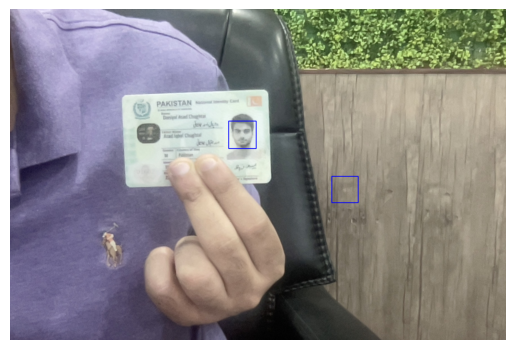

In [ ]:
# Displaying the image with detected CNIC faces
plt.imshow(pil_image)
plt.axis('off')
plt.show()

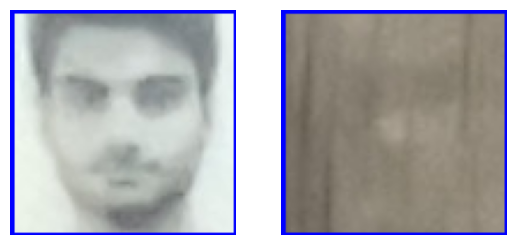

In [ ]:
# Here I'm Cropping the detected CNIC faces
for idx, (x, y, w, h) in enumerate(faces2):
    # Crop the face region
    face_cropped2 = image2[y:y+h, x:x+w]

    # Here I'm displaying the cropped CNIC face
    plt.subplot(1, len(faces2), idx + 1)
    plt.imshow(cv2.cvtColor(face_cropped2, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

In [ ]:
# Resize the cropped face to the size of the reference image
face_cropped2_resized = cv2.resize(face_cropped2, (face_cropped.shape[1], face_cropped.shape[0]))

In [ ]:
# Calculate SSIM (Structural Similarity Index) between the cropped face and reference face
from skimage.metrics import structural_similarity as ssim

In [ ]:
similarity_score = ssim(face_cropped2_resized, face_cropped, win_size=3)

In [ ]:
print(f"Similarity Score: {similarity_score:.2f}")


Similarity Score: 0.62


In [ ]:
# Display the cropped face and similarity score
plt.subplot(len(faces2), 2, 2*idx + 1)
plt.imshow(face_cropped2_resized, cmap='gray')
plt.title(f"Detected Face {idx + 1}")
plt.axis('off')

plt.subplot(len(faces), 2, 2*idx + 2)
plt.imshow(face_cropped, cmap='gray')
plt.title(f"Person Face (Similarity: {similarity_score:.2f})")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from deepface import DeepFace

result = DeepFace.verify(face_cropped2_resized, face_cropped)
print("Similarity score:", result["verified"])


Similarity score: True


In [ ]:
similarity_threshold = 0.5  # Set your desired threshold here

if result["verified"] and result["distance"] <= similarity_threshold:
    print("ID card and personal photo match.")
    print("Similarity:", result["distance"])
else:
    print("ID card and personal photo do not match.")


ID card and personal photo match.
Similarity: 0.0016432590351433962


In [ ]:
# After cropping the image
cv2.imwrite("cropped_face.jpg", face_cropped)


True

In [ ]:
from google.colab import files

# Download the cropped image
files.download("cropped_face.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Calculating The Distance Between Two pupils**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

In [ ]:
image_path = "/content/faraway.jpg"
img = cv2.imread(image_path)
# print(img)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = dlib.get_frontal_face_detector()(gray_image)
face = faces[0]  # Assuming one face is detected

In [ ]:
landmarks = predictor(image, face)

In [ ]:
x1, y1 = landmarks.part(36).x, landmarks.part(36).y  # Left pupil
x2, y2 = landmarks.part(45).x, landmarks.part(45).y  # Right pupil

In [ ]:
distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [ ]:
print(f"Distance between pupils: {distance:.2f} pixels")

Distance between pupils: 72.11 pixels


In [ ]:
known_reference_mm = 26.5

known_pixel_distance = 100.0

# Calculate the conversion factor
pixels_to_mm = known_reference_mm / known_pixel_distance

# Calculate distance in millimeters using conversion factor
distance_mm = distance * pixels_to_mm

# Display the calculated distance
print(f"Distance between pupils: {distance_mm:.2f} mm")

Distance between pupils: 19.11 mm


**Rough work**

In [ ]:
# pixels_to_mm = 0.2  # Adjust this based on your actual conversion
# distance_mm = distance * pixels_to_mm

In [ ]:
# print(f"Distance between pupils: {distance_mm:.2f} mm")

In [ ]:
# Calculate the distance between pupils in millimeters
# distance_mm = distance / 4
# print(f"Distance between pupils: {distance_mm:.2f} mm")

# **New Way Using MTCNN**

In [ ]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN
import cv2

In [ ]:
# Load the image
image_path = "/content/drive/MyDrive/testing/face/f1.jpg"
image = cv2.imread(image_path)

In [ ]:
# Create an instance of the MTCNN model
model = MTCNN()
faces = model.detect_faces(image)

1/1 [==============================] - 0s 156ms/step


In [ ]:
# Draw bounding boxes around detected faces
for face in faces:
    x, y, width, height = face['box']
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

In [ ]:
# Convert CNIC image from OpenCV format to PIL format for displaying in Colab
pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

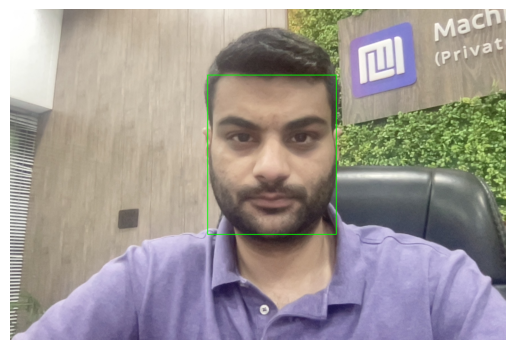

In [ ]:
# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

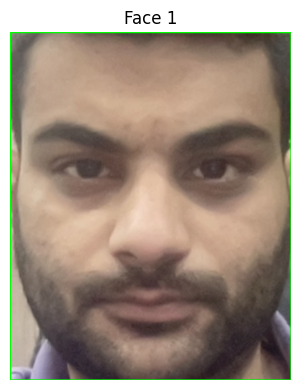

In [ ]:
plt.figure(figsize=(5, 4))

for idx, face in enumerate(faces):
    x, y, w, h = face['box']
    face_cropped = image[y:y+h, x:x+w]

    plt.subplot(1, len(faces), idx + 1)
    plt.imshow(cv2.cvtColor(face_cropped, cv2.COLOR_BGR2RGB))
    plt.title(f"Face {idx + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**For CNIC Detection**

In [ ]:
# Load the image
image_path = "/content/drive/MyDrive/testing/id/id1.jpg"
image = cv2.imread(image_path)

In [ ]:
# Create an instance of the MTCNN model
detector = MTCNN()
detect = detector.detect_faces(image)

1/1 [==============================] - 0s 167ms/step


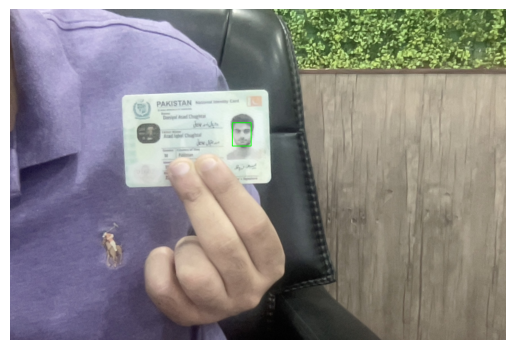

In [ ]:
if len(detect) > 0:
    result = detect[0]
    x, y, w, h = result['box']

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No ID card detected.")

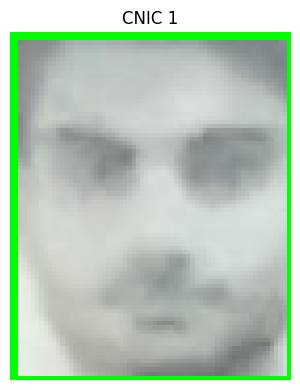

In [ ]:
plt.figure(figsize=(5, 4))

for idx, result in enumerate(detect):
    x, y, w, h = result['box']
    face_cropped2 = image[y:y+h, x:x+w]

    plt.subplot(1, len(detect), idx + 1)
    plt.imshow(cv2.cvtColor(face_cropped2, cv2.COLOR_BGR2RGB))
    plt.title(f"CNIC {idx + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
from skimage.metrics import structural_similarity as compare_ssim

In [ ]:
print("Loading images...")
# image1 = cv2.imread("/content/drive/MyDrive/Data/ID-Card/IdCard.jpeg")
# image2 = cv2.imread("/content/drive/MyDrive/Data/Face-Pic/Face2.jpeg")
image1 = face_cropped
image2 = face_cropped2

if image1 is None or image2 is None:
    print("Error loading images.")
    exit()
else:
   print("Images loaded successfully.")

Loading images...
Images loaded successfully.


In [ ]:
# Resize images to the same dimensions if needed
if image1.shape != image2.shape:
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
    print("Images is resized successfully!")
else:
   print("Images loaded successfully.")

Images is resized successfully!


In [ ]:
# Convert images to grayscale
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [ ]:
ssim_score = compare_ssim(img1, img2)

if ssim_score >= 0.65:
    print(f"SSIM Score: {ssim_score:.4f}")
    print("CNIC and Person Photo Match")
else:
  print(f"SSIM Score: {ssim_score:.4f}")
  print("CNIC and Person Photo doesn't Match")

SSIM Score: 0.4764
CNIC and Person Photo doesn't Match


# **Calculating The Distance Between Two pupils**

In [ ]:
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

In [ ]:
image_path = "/content/drive/MyDrive/Data/Face-Pic/Face1.jpeg"
img = cv2.imread(image_path)
# print(img)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = dlib.get_frontal_face_detector()(gray_image)
face = faces[0]  # Assuming one face is detected

In [ ]:
landmarks = predictor(image, face)
x1, y1 = landmarks.part(36).x, landmarks.part(36).y  # Left pupil
x2, y2 = landmarks.part(45).x, landmarks.part(45).y  # Right pupil
distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
print(f"Distance between pupils: {distance:.2f} pixels")

Distance between pupils: 77.01 pixels


In [ ]:
# known_reference_mm = 19
# pixels_to_mm = known_reference_mm / distance
# distance_mm = distance * pixels_to_mm
# print(f"Distance between pupils: {distance_mm:.2f} mm")

In [ ]:
known_reference_mm = 26.5
known_pixel_distance = 100.0

# Calculate the conversion factor
pixels_to_mm = known_reference_mm / known_pixel_distance

# pixels_to_mm = known_reference_mm / distance

# Calculate distance in millimeters using conversion factor
distance_mm = distance * pixels_to_mm

# Display the calculated distance
print(f"Distance between pupils: {distance_mm:.2f} mm")

Distance between pupils: 20.41 mm


# **Drawing Dots on the eyes pupils**

In [ ]:
# cv2.circle(img, (x1, y1), 2, (0, 0, 255), -1)  # Red circle for left pupil
# cv2.circle(img, (x2, y2), 2, (0, 0, 255), -1)  # Red circle for right pupil

# # Convert image from OpenCV format to PIL format for displaying in Colab
# pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# # Displaying the image with detected faces
# plt.imshow(pil_image)
# plt.axis('off')
# plt.show()

In [ ]:
# known_reference_mm = 19.0
# # known_pixel_distance = 100.0

# # Calculate the conversion factor
# # pixels_to_mm = known_reference_mm / known_pixel_distance

# pixels_to_mm = known_reference_mm / distance

# # Calculate distance in millimeters using conversion factor
# distance_mm = distance * pixels_to_mm

# # Display the calculated distance
# print(f"Distance between pupils: {distance_mm:.2f} mm")

In [ ]:
# from google.colab.patches import cv2_imshow
# # Draw a circle between the pupils
# cv2.circle(img, (x1, y1), 2, (0, 0, 255), -1)  # Draw a red circle on the left pupil
# cv2.circle(img, (x2, y2), 2, (0, 0, 255), -1)  # Draw a red circle on the right pupil
# cv2.circle(img, ((x1 + x2) // 2, (y1 + y2) // 2), int(distance / 2), (0, 255, 0), 2)  # Draw a green circle between pupils

# # Display the image with circles
# cv2.imshow(img)

# Draw circles around pupils
cv2.circle(img, (x1, y1), 2, (0, 0, 255), -1)  # Red circle for left pupil
cv2.circle(img, (x2, y2), 2, (0, 0, 255), -1)  # Red circle for right pupil

# Convert image from OpenCV format to PIL format for displaying in Colab
pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Displaying the image with detected faces
plt.imshow(pil_image)
plt.axis('off')
plt.show()

In [ ]:
# # Calculate the average interocular distance in millimeters
# avg_inter_dis_mm = distance_mm / 2

# # Display the average interocular distance
# print(f"Average Interocular Distance: {avg_inter_dis_mm:.2f} mm")

Average Interocular Distance: 9.55 mm


In [ ]:
# # Calculate SSIM and MSE
# ssim_score = compare_ssim(img1, img2)
# # mse = ((img1 - img2) ** 2).mean()

# print(f"SSIM Score: {ssim_score:.4f}")
# # print(f"Mean Squared Error: {mse:.2f}")

In [ ]:
# import cv2
# import numpy as np

# # Load the image
# image = cv2.imread("/content/close.jpg")
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply pupil detection algorithm (replace with your own detection method)
# # For example, you might use thresholding, edge detection, or deep learning-based methods.
# # Here, we'll use Hough Circle Transform for demonstration purposes.
# circles = cv2.HoughCircles(
#     gray_image,
#     cv2.HOUGH_GRADIENT,
#     dp=1,
#     minDist=50,
#     param1=100,
#     param2=30,
#     minRadius=5,
#     maxRadius=30
# )

# if circles is not None:
#     circles = np.uint16(np.around(circles))

#     # Extract pupil positions
#     left_pupil = (circles[0][0][0], circles[0][0][1])
#     right_pupil = (circles[0][1][0], circles[0][1][1])

#     # Calculate the distance in pixels
#     distance_pixels = np.sqrt((right_pupil[0] - left_pupil[0])**2 + (right_pupil[1] - left_pupil[1])**2)

#     # Convert distance from pixels to millimeters using a known conversion factor
#     pixels_to_mm = 0.2  # Adjust this based on your actual conversion
#     distance_mm = distance_pixels * pixels_to_mm

#     print("Distance between pupils (pixels):", distance_pixels)
#     print("Distance between pupils (mm):", distance_mm)

#     # Draw circles around pupils for visualization
#     for circle in circles[0]:
#         cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
#         cv2.circle(image, (circle[0], circle[1]), 2, (0, 0, 255), 3)

#     # Display the image with circles
#     cv2.imshow("Pupil Detection", image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
# else:
#     print("Pupils not detected.")


In [ ]:
# # Save the image with marked pupils
# output_image = Image.fromarray(image)
# output_path = "detected_image.jpg"
# output_image.save(output_path)

# # Download the saved image
# files.download(output_path)


In [ ]:
# Draw circles around pupils
# cv2.circle(img, (x1, y1), 2, (0, 0, 255), -1)  # Red circle for left pupil
# cv2.circle(img, (x2, y2), 2, (0, 0, 255), -1)  # Red circle for right pupil

# # Convert image from OpenCV format to PIL format for displaying in Colab
# pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# # Displaying the image with detected faces
# plt.imshow(pil_image)
# plt.axis('off')
# plt.show()


# # # Save the marked image
# # cv2.imwrite("marked_image.jpg", img)

# # # Show the marked image (optional)
# # cv2.imshow("Marked Image.jpg", img)

In [ ]:
# import cv2
# import dlib
# import math
# from PIL import Image
# import numpy as np

In [ ]:
# # Load the image using OpenCV
# image_path = "/content/faraway.jpg"
# image = cv2.imread(image_path)

In [ ]:
# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Load the face cascade classifier
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
# # Detect faces in the grayscale image
# faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


# # Iterate over each detected face
# for (x, y, w, h) in faces:
#     # Extract the region of interest (ROI) corresponding to the detected face
#     face_roi = gray[y:y+h, x:x+w]

In [ ]:
    # # Load the pre-trained facial landmarks detector
    # predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    # # Detect facial landmarks for the ROI
    # landmarks = predictor(face_roi, dlib.rectangle(0, 0, w, h))

    # # Extract the coordinates of pupils (landmarks 36 and 45)
    # x1, y1 = landmarks.part(36).x, landmarks.part(36).y  # Left pupil
    # x2, y2 = landmarks.part(45).x, landmarks.part(45).y  # Right pupil

In [ ]:
    # # Calculate the distance between pupils in pixels
    # distance_pixels = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # distance_mm = distance_pixels / 4.1
    # print(f"Distance between pupils: {distance_mm:.2f} mm")

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [ ]:
import os

In [ ]:
face_images_dir = "/content/drive/MyDrive/testing/face/"
id_card_dir = ""

In [ ]:
# Lists to store ground truth labels and model predictions
truth = [1, 1, 1, 1, 1, 1]
model_predictions = []
# [1, 1, 1, 1, 1, 1]
# Loop through face images
for image_filename in os.listdir(face_images_dir1):
    image_path = os.path.join(face_images_dir1, image_filename)
    image = cv2.imread(image_path)
    faces = detector.detect_faces(image)
    if faces:
        model_predictions.append(1)  # Face detected
    else:
        model_predictions.append(0)  # No face detected
        # truth.append(1)  # Ground truth: Contains a face


In [ ]:
conf_matrix = confusion_matrix(truth, model_predictions)


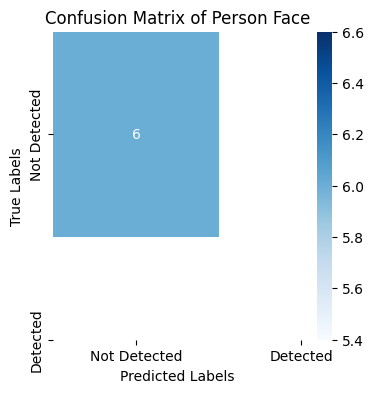

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Detected', 'Detected'], yticklabels=['Not Detected', 'Detected'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Person Face')
plt.show()


In [ ]:
!pip install numpy matplotlib scikit-learn opencv-python

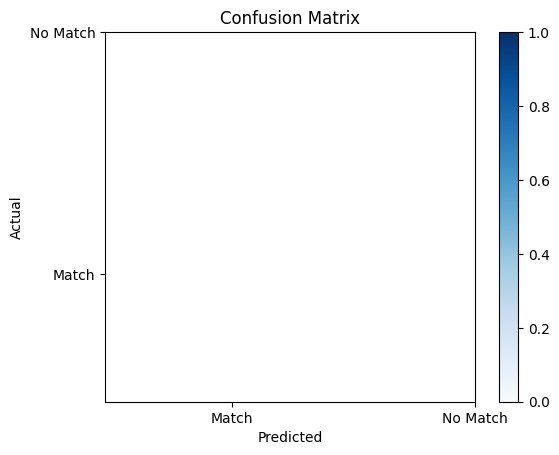

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import cv2

# Paths to the directories containing images
face_dir = "/content/drive/MyDrive/testing/face"
id_card_dir = "/content/drive/MyDrive/testing/id"

# List the filenames in each directory
face_filenames = os.listdir(face_dir)
id_card_filenames = os.listdir(id_card_dir)

# Assuming your filenames have some common structure, you can extract IDs from them
face_ids = [filename.split("_")[1] for filename in face_filenames if filename.startswith("/content/drive/MyDrive/testing/face/f1.jpg")]
id_card_ids = [filename.split("_")[1] for filename in id_card_filenames if filename.startswith("/content/drive/MyDrive/testing/id/id1.jpg")]

# Match IDs and check if image1 matches with an image
matching_results = [face_id == id_card_id for face_id, id_card_id in zip(face_ids, id_card_ids)]

# Calculate confusion matrix
conf_matrix = confusion_matrix(matching_results, [True] * len(matching_results))

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["Match", "No Match"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# import os
# import cv2
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Paths to your directories
# person_face_dir = "/content/drive/MyDrive/testing/face"
# id_card_dir = "/content/drive/MyDrive/testing/id"

# # Load the Haar Cascade model for face detection
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# def detect_and_crop_faces(image_path):
#     image = cv2.imread(image_path)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Detect faces using Haar Cascade
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

#     cropped_faces = []
#     for i, (x, y, w, h) in enumerate(faces):
#         face_image = image[y:y+h, x:x+w]
#         cv2.imwrite(f"cropped_face_{i}.jpg", face_image)
#         cropped_faces.append(face_image)

#     return cropped_faces

# # Perform face detection and cropping
# person_face_images = [os.path.join(person_face_dir, img) for img in os.listdir(person_face_dir)]
# id_card_images = [os.path.join(id_card_dir, img) for img in os.listdir(id_card_dir)]

# for img_path in person_face_images + id_card_images:
#     detect_and_crop_faces(img_path)


In [ ]:
!pip install opencv-python face-recognition scikit-learn matplotlib

In [ ]:
!pip install opencv-contrib-python

In [ ]:
!pip install openface

In [ ]:
!pip install openface dlib

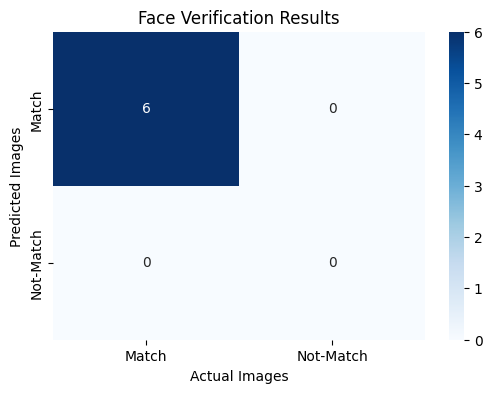

In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

person_face_dir = "/content/drive/MyDrive/testing/face"
id_card_dir = "/content/drive/MyDrive/testing/id"
image_size = (97, 97)
person_faces = []
id_card_faces = []

for img_path in os.listdir(person_face_dir):
    image = cv2.imread(os.path.join(person_face_dir, img_path))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) > 0:
        person_faces.append((cv2.resize(image, image_size), img_path))  # Store both image and path

for img_path in os.listdir(id_card_dir):
    image = cv2.imread(os.path.join(id_card_dir, img_path))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) > 0:
        id_card_faces.append(cv2.resize(image, image_size))

# Calculate face similarity
face_distance_threshold = 0.6
matches = {}  # Dictionary to store matches

for person_face, person_path in person_faces:
    if person_path in matches:
        continue

    person_embedding = cv2.cvtColor(person_face, cv2.COLOR_BGR2GRAY)

    for id_card_face in id_card_faces:
        id_card_embedding = cv2.cvtColor(id_card_face, cv2.COLOR_BGR2GRAY)
        distance = np.linalg.norm(person_embedding - id_card_embedding)

        if distance >= face_distance_threshold:
            matches[person_path] = True
            break

# Calculating the confusion matrix
true_positive = sum(1 for match in matches.values() if match)
false_positive = len(matches) - true_positive

confusion_matrix_data = np.array([
    [true_positive, false_positive],
    [0, 0]
])

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Blues")
plt.xticks([0.5, 1.5], ["Match", "Not-Match"])
plt.yticks([0.5, 1.5], ["Match", "Not-Match"])
plt.xlabel("Actual Images")
plt.ylabel("Predicted Images")
plt.title("Face Verification Results")
plt.show()
